# Data Visualization with Matplotlib and Seaborn

### Agenda: 
- Explain what types of graphs best convey specific relationships
- Use the subplots syntax to create a graph
    - Line
    - Bar
    - Scatter
    - Hist
- Customize different aspects of a graph
    - labels (title, axis)
    - Linestyle 
    - Colors
- Create multiple graphs in one figure


# Activation Exercise

Take 3 minutes in groups of 3 to think about what types of plots would be best to visualize the scenarios below.  
Peruse some plot examples here for ideas:
[Python Graphing Gallery](https://python-graph-gallery.com) or [Data Viz Project](https://datavizproject.com/)


### Scenario 1: You would like to display counts of coffee shops in each Chicago zipcode?

### Scenario 2: You would like to visualize the correllation between miles per gallon of a car and horsepower

### Scenario 3: You would like to visualize the distribution of blood pressure readings of American males between 25 and 35

## Why Visualize Data?
or why can’t we just hand someone a table of data?

Let's load up the iris data set.  This is a famous built-in dataset which is used to learn about categorization. There is a lot of code in the cell below which will become much more familiar as we proceed through the course.  For now, just take a glance, but don't worry if it doesn't make sense yet.

Here is an image of one of the virginica iris, which is unique in its relative petal and sepal length.

![virginica_iris](iris_virginica.jpg)

### Dataframe vs Graph: Which do you prefer?

As data scientists, you will look at dataframes everyday.  You will learn how to inspect different aspects of them with the methods associated with the dataframe object.  For example, to get a quick idea of the type of data, we can use the .sample() method.

One skill you will develop is the ability to quickly generate visualizations after getting a general sense of the dataframe contents.  Let's plot two of the columns above, sepal length vs petal length. With a glance, we can see new patterns in the data. 

What information in this graph jumps out to you?

In your **presentation decks**, you will no doubt be tempted to print out the head of a data frame, take a screen shot, and plop it in the middle of a slide.  We all have that instinct; the dataframe object will become one your most cherished objects. If you put them in your deck, you will no doubt hear one of us gently request its replacement with some other figure.

## The Effectiveness of Visualizations

- People are **highly visual** and can synthesize visual information such more quickly than rows and columns of numbers 
- **Precognitive** understanding of the data
- Visual representations can be much more **viscerally persuasive**

## What Makes an Effective Visualization?

- Each graph should have a **clear poin**t it is trying to make. Understanding the insight you are trying to convey will guide the decision making process for what kind of graph will be most effective

- Know your **audience**! Come up with a use case and audience to pitch your visualizations

- Choosing the correct graph for the **relationship** you are trying to communicate

- **Label** your axes and graph! It should not be difficult for someone to understand what your graph is trying to represent

- People have unconscious responses to visuals which will effect the way they interpret information. Good visualization makes use of these natural shortcuts in cognition to convey information more efficiently
     - **Red** and Down tends to be negative while **Green** and Up is positive
     - **Lighter hues** are seen as lower values and darker is higher values
     - Axis start at **zero**
        
__Note:__ All of these 'rules' can be broken but know that you will be working against most people's first instinct

## How to Lie with Graphs

- Graphs can be misleading
- Consciously or unconsciously people will make decisions to lead people towards their conclusions of the data

- Examples of dark patterns
        - Changing the axis scale
        - Using two different y axis scales to compare trends
        - Showing cumulative data which will always be increasing to hide a downturn in a trend
        - Pie charts (comparing degrees is not something people are good at) just use a bar chart
        - Inconsistent units
        - Not showing all of the data for motivated reasons
        - Percentages not adding up to 100

<img src="data/pie-chart-misleading.png">

image: http://flowingdata.com/2009/11/26/fox-news-makes-the-best-pie-chart-ever/

_____



<img src="data/usa-today-2.png">

# Matplotlib

The matplotlib library will be our foundational visualization tool. Mastering it will allow you to create beautiful graphs quickly.  We can then include these graphs in our README's, final notebooks, and presentation decks. 

<img src="data/matplotlib_anatomy.png">

Explanation of non-obvious terms

__Figure__ - This is the sheet of paper all of your graphing sits on. 

__Axis__ - An axis is an individual plot. You can have multiple axes on one figure

__Major/Minor Ticks__ - The large and small dashes on the x and y axis

__Markers__ - In a scatter plot each of the points is refered to as a marker

__Spines__ - The lines that bound each axis

# Common Charts and Their Uses

# Scatter Plots

Scatter plots are also very common.  They allow one to visualize the relationship of two variables. 

In the plots below, we see different correlations between variables:



Let's import some NBA data, and use the matplotlib scatter plot to look at correlations.

### Is there a correlation between career points/game and average career salary?


As we move into modeling, we will begin talking about the relationship of a target variable and a feature.  If we are predicting salary using a linear model, seeing strong positive correlation suggests that Points Per Game may be an important feature to include in our model.

### Is there a correlation between height and career assists?

# The graph above is missing a title and labels.  
Let's work together to add labels using the methods reference in the link below.  
Reference [this link](https://python-graph-gallery.com/4-add-title-and-axis-label/)

We can also change [color](https://matplotlib.org/3.1.0/gallery/color/named_colors.html), opacity, marker size, and [marker symbol](https://matplotlib.org/3.2.1/api/markers_api.html).  
Below, we have a list of parameters with incorrect values.  Place the values into the correct parameters to create a scatter plot of the correlation between "height" and "assists" with large red triangles sized according to player salary.

# Pair Programming: 5 minutes
Have a conversation with your partners and decide how to rearrange the variables into the correct pattern. Don't forget the labels.

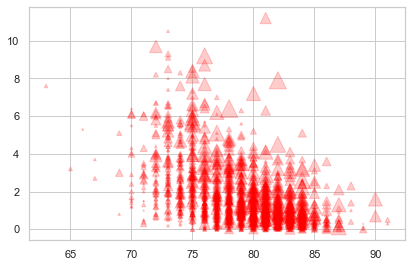

In [175]:

a = height
b = 100
c = .2 
d = 'red'
e = 'pink' 
f = '^'
g = career_assts
h = individual_players['salary']/20000

plt.scatter(x=a , y=g, alpha=c, c=d, marker=f, s=h)


## Line Plot

Tracks the change of a single variable over time.  They are generally better than bar graphs over shorter periods of time.  They will become especially useful when we look into time series.

Here is some code to read in some well worn shampoo sales data over a three year period.

## The xticks are illegible in the plot above.



One way to combat that is to try rotating the ticks.  
Use [this documentation](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/ticklabels_rotation.html) to learn how to rotate.

While you're at it, change the [linestyle](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html).

# Pair Programming # 1
Now, in groups of 2, take 3 minutes to see if you can do better. Look into the xticks documentation further. Try to reduce the number of ticks to increase visability

This can be tricky.  Don't get discouraged if you can't get it.

**hint** here are then indexes for the xticks

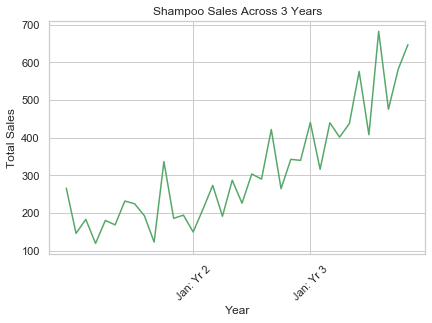

In [181]:
plt.plot(shampoo.Month, shampoo.iloc[:,1], color='g')
plt.title('Shampoo Sales Across 3 Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks([13,25], ['Jan: Yr 2', 'Jan: Yr 3'], rotation=45);

## Bar charts

Bar charts are everywhere: powerpoints, billboards and the evening news. They are used to show the relationship of a numerical and a categorical variable.

For example, a bar chart can show the growth of a single categorical variable across time.



The plot about is small. Adjust the figure size to make it bigger.
Look at [this link](https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib)

## Histograms

We will get get further into histograms in mod 2, but it is good to get familiar with them sooner rather than later. 

Histograms create uniform bins across the entire range of a continuous variable. They then count the number of data points which fall into each bin.  

Histograms are often confused with bar charts, since they look somewhat similar.  The big difference, however, is that histograms visualize the distribution of a continuous variable, rather than the discrete variable shown by barcharts. You can remember this because the bins of histograms don't have spaces between them.



![histogram_ex](images/histogram_example.svg)

Can we see a visual difference between in hourly ride count distributions between weekdays and weekends?


## Layering

![cake](https://media.giphy.com/media/XMgCFjsCSARxK/giphy.gif)

If we want to add multiple plots on one axis, we can simply call the plotting functions one after the other. 

## Box Plots

Box plots (or box-and-whisker plots), like histograms, show the distribution of a continous variable.  They have a median line, where half the data falls above, half below.  The box represents the interquartile range, and the whiskers encompass (most often) 95% of the data. We can detect skew from a boxplot, and it is also a quick way to see detect outliers.

Again, we will get further into boxplots in mod 2.

![boxplot](images/boxplot.png)

## Plotting Syntax

- There are many different ways to create plots but we will strongly suggest using the subplots method  
```fig, ax = plt.subplots()```  
```fig, (ax_1, ax_2) = plt.subplots(1,2)```


    - This is useful for extensibility 
    - Gives you access to the figure and individual axis in a plot
    - More fine grained control of customizing your plot
    - Easily create additional axis on your figure
    - This syntax is a good level of abstraction
        - You can go deeper into the api but this should give you immediate access to most tools you will need for whatever plot you are making
    - Flatiron Specific
        - Plotting code will be more easily readable for other students and instructors
        - You don’t need to remember many different ways to organize your code

Here are links to the [matplotlib documentation](https://matplotlib.org/index.html) as well as the [Axes object documentation](https://matplotlib.org/api/axes_api.html):

We will now walk through some common charts and their uses, while practicing our matplotlib syntax

# Pair Programming 2:

We want to display the boxplot and the histogram of the boston housing sales prices side by side.  
To do so, we will us the plt.subplots() convention.  

The cell below is missing the appropriate ax and fig variables, so it will not run.  

In groups of two, take 3 minutes to add in the appropriate variables to make the cell function.

''

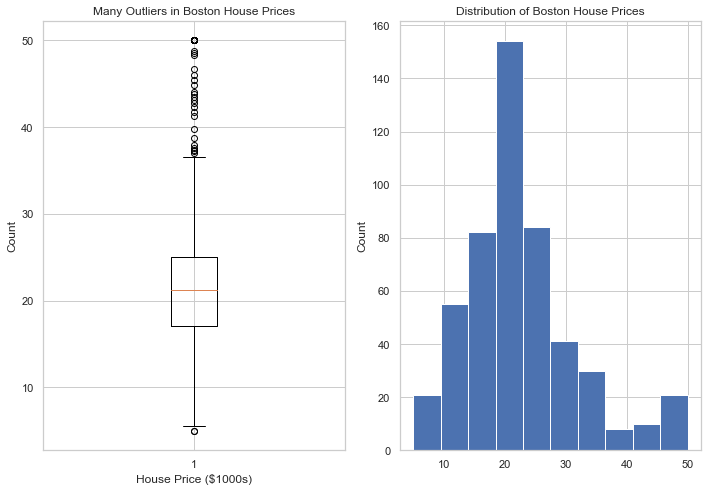

In [201]:
fig, (ax_1, ax_2) = plt.subplots(1,2)
fig.set_figheight(7)
fig.set_figwidth(10)

ax_1.boxplot(house_prices)
ax_1.set_xlabel('House Price ($1000s)');
ax_1.set_ylabel('Count')
ax_1.set_title('Many Outliers in Boston House Prices')

ax_2.hist(house_prices)
ax_2.set_ylabel('Count')
ax_2.set_title('Distribution of Boston House Prices')

plt.tight_layout()
;

### Quick note: style sheets are cool

Find another style from the Docs and set the style. Once you've set the style try rerunning older graphs:

[Style Sheets](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html)

## Saving your figures

Let's split the shampoo sales into years, and plot three line plots, one on top of the other

# Seaborn

[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

[List of Graphing Methods for Seaborn](https://seaborn.pydata.org/api.html#relational-api)

Seaborn is a wrapper around matplotlib which provides a high-level interface for drawing attractive and informative statistical graphics

## Violin Plot

## Kernel Density Estimation Plot